# NetworkXによるベルマンフォード法

対応する動画：[NetworkXで最短経路問題　⑯ベルマンフォード法【研究で使うPython #59】](https://youtu.be/WvNV6fQdi9Q)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 必要モジュールのインポート

In [1]:
%matplotlib inline
import networkx as nx

## ネットワークの生成

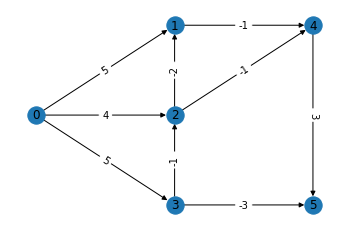

In [5]:
G = nx.DiGraph() # 空の有向グラフ生成

# 重み付きグラフの生成
nodes = [0, 1, 2, 3, 4, 5] # ノード
edges = [(0, 1, 5), (0, 2, 4), (0, 3, 5), (1, 4,-1), (2, 4, -1), (3, 2, -1), (3, 5, -3), (4, 5, 3), (2, 1, -2)]


G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# 各ノードの座標
pos = {0:(0,0), 1:(1,1), 2:(1,0), 3:(1,-1), 4:(2,1), 5:(2,-1)}

# 重み（距離）の表示
#nx.draw_networkx_edge_labels(G, pos)

# 重みのみの表示
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

# 描画
nx.draw(G, pos, with_labels=True)

## 自作のベルマンフォード法

In [3]:
INF = 100000 # 十分大きい値
V = len(nodes) # ノード数
D = [INF for i in range(V)] # 更新していく各ノードまでの最小コスト配列(全てINFで初期化)
D[0] = 0 # 始点のコストを0に設定

for i in range(V-1): # 負の閉路がない場合，V-1のループで終了できる
    for e in edges:
        if D[e[0]] + e[2] < D[e[1]]: # （ノードuの最小コスト＋エッジのコスト）＜（ノードvの暫定最小コスト）
            D[e[1]] = D[e[0]] + e[2] # ノードvの暫定最小コストを更新
    print(D)

[0, 2, 4, 5, 3, 2]
[0, 2, 4, 5, 1, 2]
[0, 2, 4, 5, 1, 2]
[0, 2, 4, 5, 1, 2]
[0, 2, 4, 5, 1, 2]


## NetworkXの組み込み関数を使ったベルマンフォード法

In [4]:
print(nx.single_source_bellman_ford(G, 0))

({0: 0, 1: 2, 2: 4, 3: 5, 4: 1, 5: 2}, {0: [0], 1: [0, 2, 1], 2: [0, 2], 3: [0, 3], 4: [0, 2, 1, 4], 5: [0, 3, 5]})
